- PCA itu untuk menemukan arah varian dan varian diukur dari titik pusat atau rata rata
- Memusatkan data dengan menghitung rata-rata setiap kolom pixel x lalu dikurangi setiap elemen dengan nilai rata rata untuk mendapatkan nilai yang terpusat.
- Hitung matriks kovarians dari matriks x. jadi cari C dari Xc dengan rumusnya (rumus ppt)
- untuk eigenvektor itu untuk memberi arah dari sumbu baru data dan eigenvalue itu menghasilkan nilai yang penting dari eigenvektor. Semakin besar berarti varian data banyak
- Urutkan pasangan eigenvektor dan eigenvalue dari terbesar hingga terkecil dan ambil eigenvektor sesuai k yang diinginkan. Misal k=25 berarti ambil 25 teratas
- Jumlahkan eigenvektor yang mana nantinya jadi sebuah matriks proyeksi
- Kalikan matriks data terpusat dengan matrik proyeksi untuk representasi gambar

- SVD
- ....




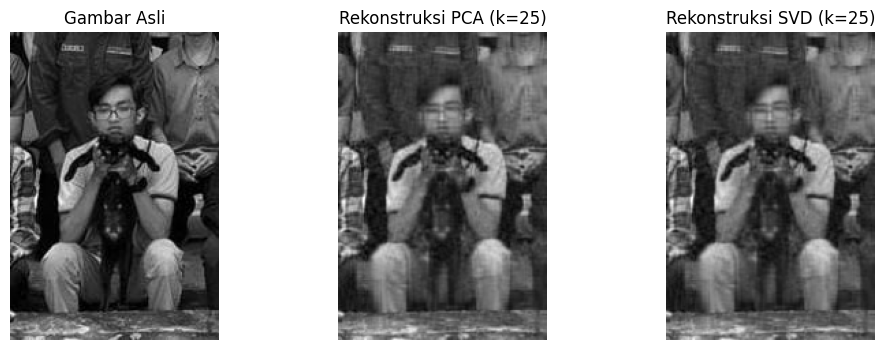

Jumlah fitur gambar asli (per baris): 153
Jumlah total fitur (piksel) gambar asli: 34578

Jumlah fitur (komponen utama) PCA yang disimpan: 25
Nilai eigenvalue (PCA):
  Komponen 1: 91400.6011
  Komponen 2: 43333.2247
  Komponen 3: 34453.1416
  Komponen 4: 23975.6561
  Komponen 5: 17410.3199
  Komponen 6: 12822.5821
  Komponen 7: 11305.6235
  Komponen 8: 10758.1495
  Komponen 9: 8865.2318
  Komponen 10: 5285.6942
  Komponen 11: 5045.0648
  Komponen 12: 4327.9300
  Komponen 13: 4268.7855
  Komponen 14: 3650.2402
  Komponen 15: 2876.9610
  Komponen 16: 2487.5027
  Komponen 17: 2292.1178
  Komponen 18: 2108.6568
  Komponen 19: 2078.4859
  Komponen 20: 1656.4146
  Komponen 21: 1596.5178
  Komponen 22: 1431.9088
  Komponen 23: 1353.7625
  Komponen 24: 1212.5330
  Komponen 25: 1065.8962

Jumlah fitur (komponen utama) SVD yang disimpan: 25
Nilai singular value (SVD):
  Komponen 1: 13674.2852
  Komponen 2: 4419.0586
  Komponen 3: 2815.5496
  Komponen 4: 2393.0291
  Komponen 5: 1984.5144
  Kompon

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar dan konversi ke array float
img = cv2.imread('img/gregeddd.jpg', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32)
k = 25

# --- PCA dengan numpy ---
X = img.copy()
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
cov = np.cov(X_centered, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx][:k]
eigvecs = eigvecs[:, idx][:, :k]
fitur_pca = np.dot(X_centered, eigvecs)
# Rekonstruksi
X_recon = np.dot(fitur_pca, eigvecs.T) + X_mean

# --- SVD dengan numpy ---
U, S, Vt = np.linalg.svd(img, full_matrices=False)
fitur_svd = U[:, :k] * S[:k]
recon_svd = np.dot(U[:, :k] * S[:k], Vt[:k, :])

# --- Hu Moments (invariant) ---
def hu_moments(arr):
    arr_uint8 = np.clip(arr, 0, 255).astype(np.uint8)
    moments = cv2.moments(arr_uint8)
    hu = cv2.HuMoments(moments).flatten()
    return hu

hu_asli = hu_moments(img)
hu_pca = hu_moments(X_recon)
hu_svd = hu_moments(recon_svd)

# Visualisasi
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(X_recon, cmap='gray')
plt.title(f'Rekonstruksi PCA (k={k})')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(recon_svd, cmap='gray')
plt.title(f'Rekonstruksi SVD (k={k})')
plt.axis('off')
plt.show()

# Tampilkan jumlah fitur asli
total_fitur = img.shape[1]
total_piksel = img.size
print(f"Jumlah fitur gambar asli (per baris): {total_fitur}")
print(f"Jumlah total fitur (piksel) gambar asli: {total_piksel}")

# Tampilkan nilai fitur
print(f"\nJumlah fitur (komponen utama) PCA yang disimpan: {k}")
print("Nilai eigenvalue (PCA):")
for i, val in enumerate(eigvals):
    print(f"  Komponen {i+1}: {val:.4f}")
print(f"\nJumlah fitur (komponen utama) SVD yang disimpan: {k}")
print("Nilai singular value (SVD):")
for i, val in enumerate(S[:k]):
    print(f"  Komponen {i+1}: {val:.4f}")

# Tampilkan nilai Hu Moments
print("\nNilai Hu Moments (invariant):")
print("Gambar asli:")
for i, val in enumerate(hu_asli):
    print(f"  Hu[{i+1}]: {val:.6e}")
print("Rekonstruksi PCA:")
for i, val in enumerate(hu_pca):
    print(f"  Hu[{i+1}]: {val:.6e}")
print("Rekonstruksi SVD:")
for i, val in enumerate(hu_svd):
    print(f"  Hu[{i+1}]: {val:.6e}")


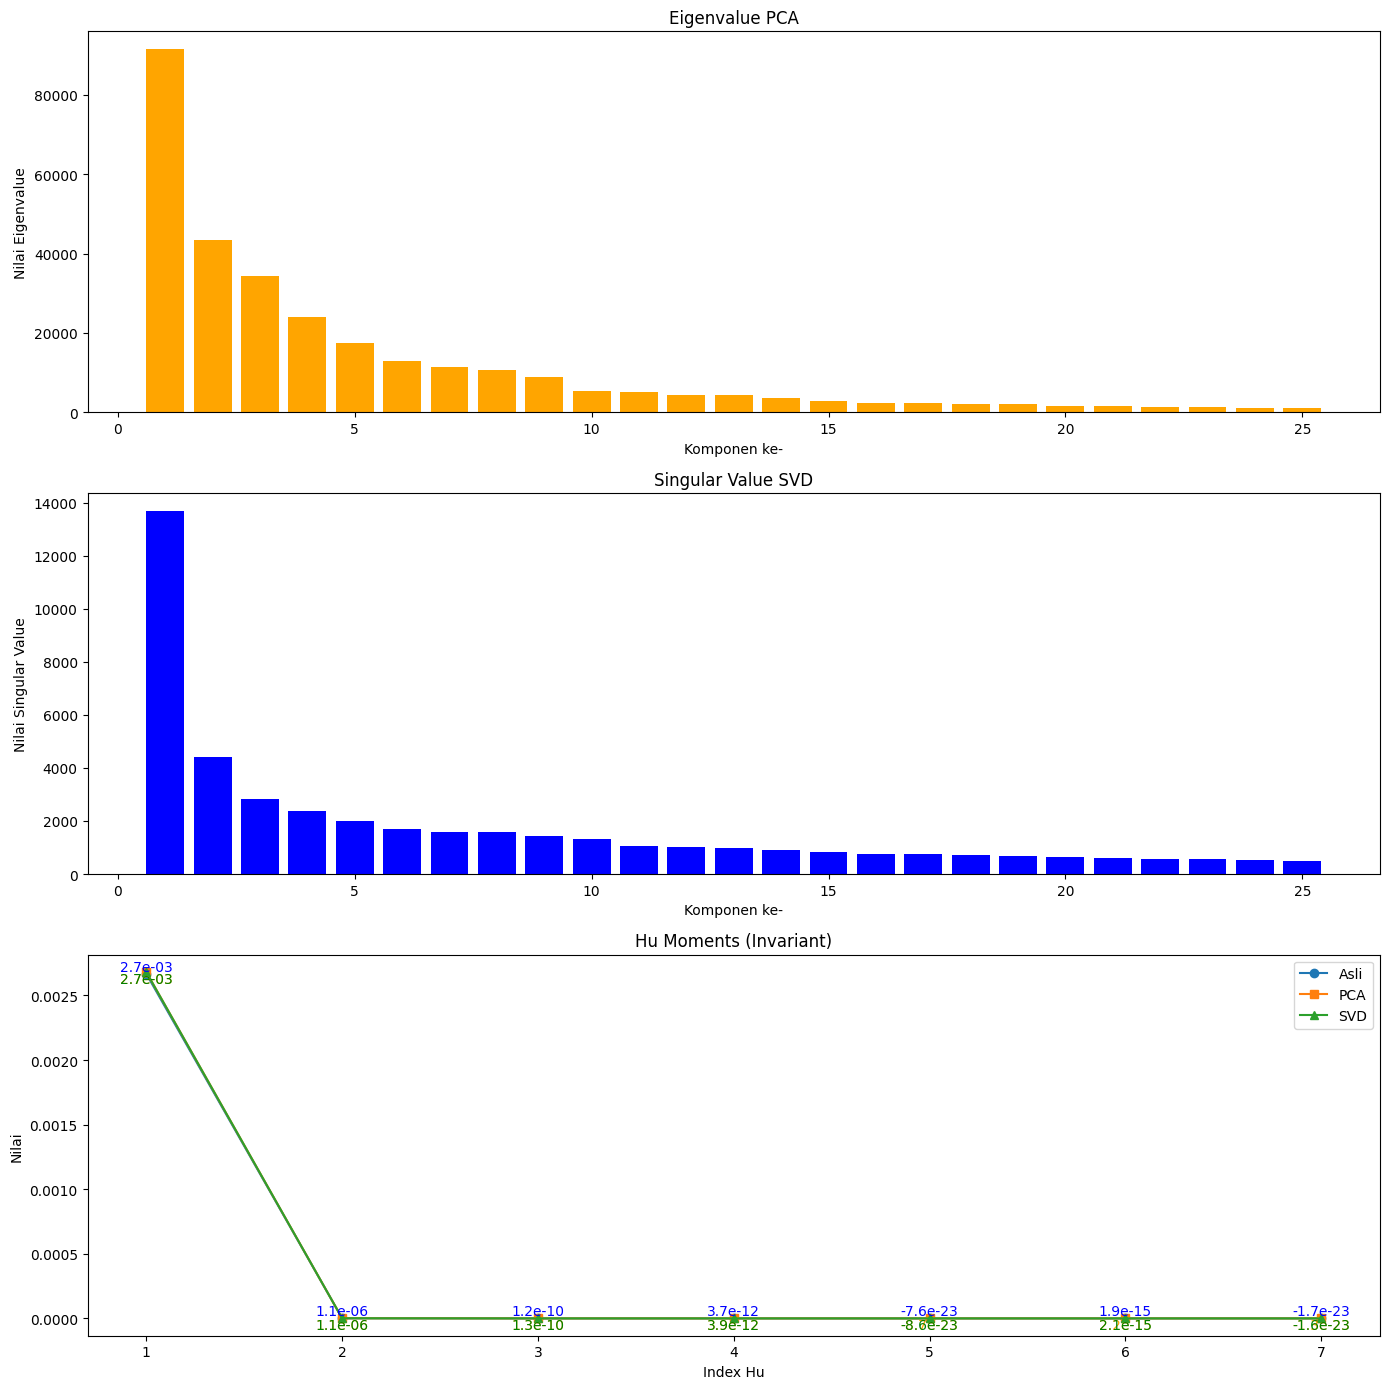

In [10]:
#grafik nilai eigenvalue PCA, singular value SVD, dan Hu Moments
plt.figure(figsize=(14,14))

plt.subplot(3,1,1)
plt.bar(range(1, k+1), eigvals, color='Orange')  # Ganti warna batang
plt.title('Eigenvalue PCA')
plt.xlabel('Komponen ke-')
plt.ylabel('Nilai Eigenvalue')

plt.subplot(3,1,2)
plt.bar(range(1, k+1), S[:k], color='Blue')
plt.title('Singular Value SVD')
plt.xlabel('Komponen ke-')
plt.ylabel('Nilai Singular Value')

plt.subplot(3,1,3)
plt.plot(range(1, 8), hu_asli, 'o-', label='Asli')
plt.plot(range(1, 8), hu_pca, 's-', label='PCA')
plt.plot(range(1, 8), hu_svd, '^-', label='SVD')
plt.title('Hu Moments (Invariant)')
plt.xlabel('Index Hu')
plt.ylabel('Nilai')

# Tambahkan angka di tiap titik Hu
for i in range(7):
    plt.text(i+1, hu_asli[i], f"{hu_asli[i]:.1e}", fontsize=10, ha='center', va='bottom', color='blue')
    plt.text(i+1, hu_pca[i], f"{hu_pca[i]:.1e}", fontsize=10, ha='center', va='top', color='orange')
    plt.text(i+1, hu_svd[i], f"{hu_svd[i]:.1e}", fontsize=10, ha='center', va='top', color='green')

plt.legend()
plt.tight_layout()
plt.show()